In [7]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = pd.read_csv('/Users/enamul/Desktop/Programming/Data/creditcard.csv')

In [3]:
# Standardizing 'Amount' and 'Time' columns
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Dropping old 'Amount' and 'Time' columns
data = data.drop(['Amount', 'Time'], axis=1)

# Defining the features (X) and the target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (227845, 30)
Test set shape: (56962, 30)


In [5]:
# Instantiate the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_mat}")

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



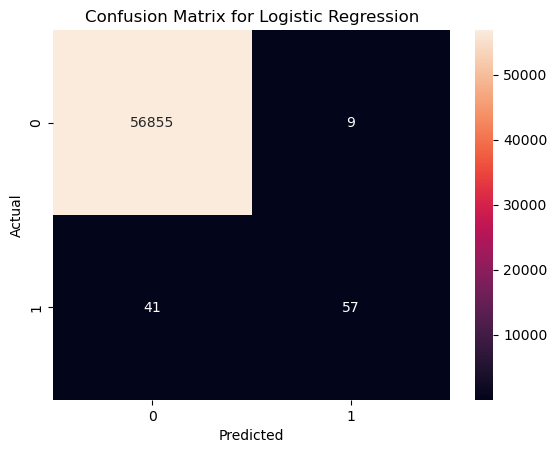

In [10]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train a RandomForest model on the up-sampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_res, y_res)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Print the confusion matrix
conf_mat_smote = confusion_matrix(y_test, y_pred_smote)
print(f"Confusion Matrix:\n{conf_mat_smote}")

# Print the classification report
class_report_smote = classification_report(y_test, y_pred_smote)
print(f"Classification Report:\n{class_report_smote}")

Confusion Matrix:
[[56854    10]
 [   15    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



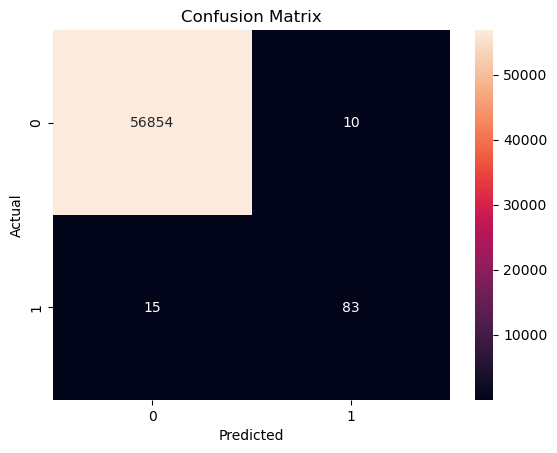

In [14]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_smote)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

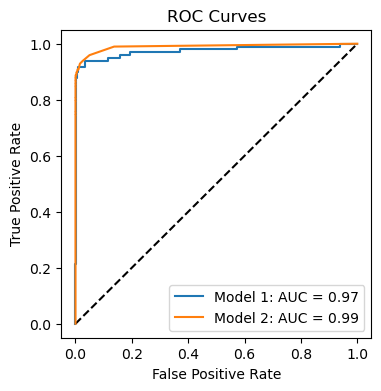

In [17]:
# Compute predicted probabilities for the first model
y_pred_prob1 = model.predict_proba(X_test)[:,1]  # replace model1 with your first model

# Generate ROC curve values: fpr, tpr, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

# Compute AUC score
auc_score1 = roc_auc_score(y_test, y_pred_prob1)

# Compute predicted probabilities for the second model
y_pred_prob2 = model_smote.predict_proba(X_test)[:,1]  # replace model2 with your second model

# Generate ROC curve values: fpr, tpr, thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

# Compute AUC score
auc_score2 = roc_auc_score(y_test, y_pred_prob2)

# Plot ROC curves
plt.figure(figsize=(4,4))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label=f"Model 1: AUC = {auc_score1:.2f}")
plt.plot(fpr2, tpr2, label=f"Model 2: AUC = {auc_score2:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()